In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [85]:
BreastCancer = pd.read_csv("/content/BreastCancer.csv")

In [86]:
BreastCancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [87]:
BreastCancer.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [88]:
print(len(BreastCancer.iloc[:,-1]))

569


In [89]:
BreastCancer = BreastCancer.drop(['Unnamed: 32'], axis=1)

In [90]:
BreastCancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [91]:
X1 = BreastCancer.iloc[:,2:].values
Y = BreastCancer.iloc[:,1].values

In [92]:
Y1 = []
for i in range(len(Y)):
  if Y[i] == 'M':
    Y1.append(-1)
  elif Y[i] == 'B':
    Y1.append(1)
    
Y1 = np.array(Y1)

In [93]:
print(X1.shape)
print(Y1.shape)


(569, 30)
(569,)


## **70:30 (train:test) split**

In [153]:
x_train,x_test,y_train,y_test = train_test_split(X1,Y1,test_size = 0.3,shuffle = True,random_state = 42)

In [154]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(398, 30)
(171, 30)
(398,)
(171,)


# Data Preprocessing for Half-Space Classifier

In [96]:
X_Malign = []
X_Benign = []
Y_Malign = []
Y_Benign = []

for i in range(len(x_train)):

  if y_train[i] == -1:
    X_Malign.append(x_train[i])
    Y_Malign.append(y_train[i])
    
  elif y_train[i] == 1:
    X_Benign.append(x_train[i])
    Y_Benign.append(y_train[i])

X_Malign = np.array(X_Malign)
X_Benign = np.array(X_Benign)

print(X_Malign.shape)
print(X_Benign.shape)

(150, 30)
(248, 30)


In [97]:
def euclidean_distance(x1,c_):
  
  dist = np.sqrt(np.sum((x1-c_)**2))

  return dist

# centroidd of Malign data
X_Malign_Centroid = X_Malign.mean(axis = 0)
X_Benign_Centroid = X_Benign.mean(axis = 0)

distance_Benign = []
distance_Malign = []

X_redundant_points = []
Y_redundant_points = []

X_sep= []
Y_sep = []


for i in range(len(y_train)):

  dist_Malign = euclidean_distance(x_train[i],X_Malign_Centroid) 
  dist_Benign = euclidean_distance(x_train[i],X_Benign_Centroid) 

  if y_train[i] == -1 and dist_Malign < dist_Benign and dist_Malign <= 1000: # -1:M, 1:B # correct

    # X_Malign_sep.append(x_train[i])
    # Y_Malign.append(y_train[i])
    X_sep.append(x_train[i])
    Y_sep.append(y_train[i])
    distance_Malign.append(dist_Malign)
  
  elif y_train[i] == -1 and dist_Malign > dist_Benign: # incorrect
    
    X_redundant_points.append(x_train[i])
    Y_redundant_points.append(y_train[i])


  elif y_train[i] == 1 and dist_Benign < dist_Malign and dist_Benign <= 200  : # -1:M, 1:B # correct

    # X_Malign_sep.append(x_train[i])
    # Y_Malign.append(y_train[i])
    X_sep.append(x_train[i])
    Y_sep.append(y_train[i])
    distance_Benign.append(dist_Benign)
  
  elif y_train[i] == 1 and dist_Benign > dist_Malign: # incorrect
    
    X_redundant_points.append(x_train[i])
    Y_redundant_points.append(y_train[i])

X_sep = np.array(X_sep)
Y_sep = np.array(Y_sep)

print(X_sep.shape)
print(Y_sep.shape)

  

(259, 30)
(259,)


# PCA 

PCA ON ORIGINAL DATASET

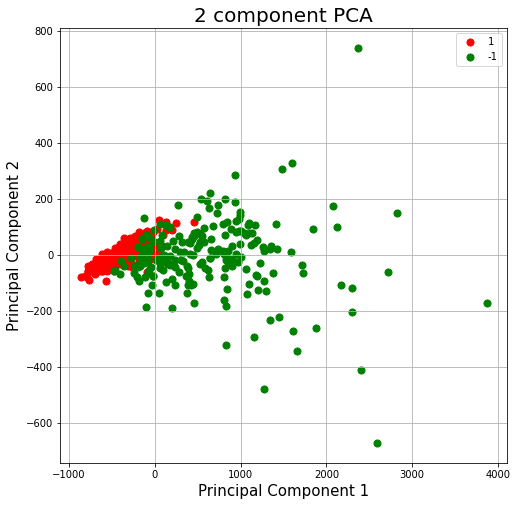

In [98]:
# PCA ON ORIGINAL DATASET
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X1)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
Y_df = pd.DataFrame(Y1,columns=['target'])
finalDf = pd.concat([principalDf, Y_df[['target']]], axis = 1)

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,-1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

PCA on Linearly Seperable Dataset





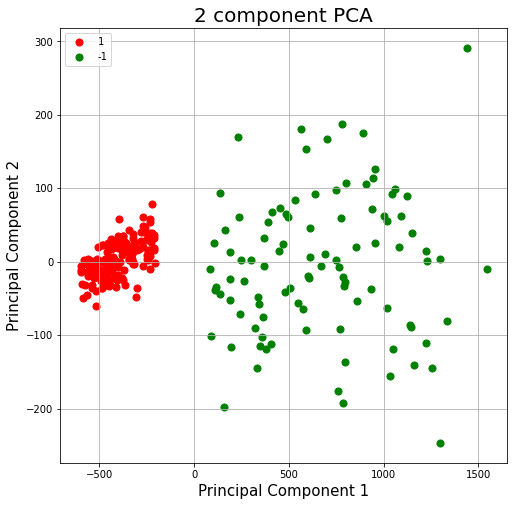

In [99]:
# PCA on Linearly Seperable Dataset

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_sep)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
Y_df = pd.DataFrame(Y_sep,columns=['target'])
finalDf = pd.concat([principalDf, Y_df[['target']]], axis = 1)
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,-1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# LP solver (scipy.optimize.linprog)

In [101]:
from scipy.optimize import linprog
A = []
for i in range(len(X_sep)):
  A.append(X_sep[i]*Y_sep[i]) 
A = -1*np.array(A)
print(A.shape)

V = -1*np.ones(len(Y_sep))
V = np.reshape(V,(len(V),1))
print(V.shape)


obj = [0 for j in range(np.array(X_sep).shape[1])]

lhs_ineq = []
rhs_ineq = []

for i in range(len(A)):
  lhs_ineq.append(list(A[i]))
  rhs_ineq.append(V[i])
bnd=(None,None)
opt = linprog(c=obj,A_ub=lhs_ineq,b_ub=rhs_ineq,bounds=bnd,method ='simplex',options={"disp": True})

(259, 30)
Optimization terminated successfully.
         Current function value: 0.000000    
         Iterations: 465


In [102]:
opt

     con: array([], dtype=float64)
     fun: 0.0
 message: 'Optimization terminated successfully.'
     nit: 465
   slack: array([ 4.55846783e+00,  4.61294724e+00,  8.10811908e+00,  1.05742802e+01,
        3.43878600e+00,  5.96607612e+00,  7.47689088e+00,  5.49048206e+00,
        6.54960099e+00,  2.31640172e+00,  5.68261840e+00,  2.17527111e+01,
        4.44445280e+00,  7.62229828e+00,  3.92917886e+00,  7.65615781e+00,
        3.13152726e+00,  1.39253040e+01,  3.55324696e+00,  8.69201756e+00,
       -2.27373675e-13,  3.20960756e+00, -4.19220214e-13,  2.25095560e+01,
        3.50499382e+00,  3.64300809e+00,  1.55874142e+00,  7.06407970e+00,
        9.30559621e-01,  2.78984603e+00,  5.71829155e+00,  3.69856599e+00,
        1.07155158e+01,  6.88858115e+00,  2.53023396e+00,  2.90950410e+00,
       -1.31450406e-13,  5.41265068e+00,  3.69379063e+00,  4.91118532e+00,
        2.67584395e+00,  4.55312437e+00,  5.20317810e+00,  4.85965293e+00,
        4.61611773e+00, -3.48165941e-13,  2.76626836

In [103]:
weights = opt['x']
print(weights.shape)


(30,)


In [104]:
optimized_weights = []
for i in weights:
  optimized_weights.append(i)
optimized_weights = np.array(optimized_weights)

y_pred_train_lp = np.sign(np.matmul(X_sep,optimized_weights))

correct = 0
incorrect = 0

for i in range(len(y_pred_train_lp)):
  if y_pred_train_lp[i] == Y_sep[i]:
    correct+=1
  else:
    incorrect+=1
    
print(correct)
print(incorrect)


y_pred_train_acc_lp = []
y_train_acc_lp = []
for i in range(len(y_pred_train_lp)):

  if y_pred_train_lp[i] == -1:
    y_pred_train_acc_lp.append(-1)
  if y_pred_train_lp[i] == 1:
    y_pred_train_acc_lp.append(1)

  if Y_sep[i] == -1:
    y_train_acc_lp.append(-1)
  
  if Y_sep[i] == 1:
    y_train_acc_lp.append(1)

y_pred_train_acc_lp = np.array(y_pred_train_acc_lp)
y_train_acc_lp = np.array(y_train_acc_lp)
# print(y_pred_train_acc_lp)
# print(y_train_acc_lp)

259
0


In [105]:
from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = y_train_acc_lp, y_pred = y_pred_train_acc_lp))
TN, FP, FN, TP = confusion_matrix(y_train_acc_lp, y_pred_train_acc_lp).ravel()
training_accuracy_lp = (TP+TN) / (TP+TN+FP+FN)
print(TN, FP, FN, TP)
print("training accuracy_lp:",training_accuracy_lp*100,"%")
print(accuracy_score(y_true = y_train_acc_lp, y_pred = y_pred_train_acc_lp))



confusion_matrix:
 [[ 98   0]
 [  0 161]]
98 0 0 161
training accuracy_lp: 100.0 %
1.0


In [106]:
y_pred_test_lp = np.sign(np.matmul(x_test,optimized_weights))
# y_test_true = np.array(y_test)
correct = 0
incorrect = 0

for i in range(len(y_pred_test_lp)):
  if y_pred_test_lp[i] == y_test[i]:
    correct+=1
  else:
    incorrect+=1
    
print(correct)
print(incorrect)

159
12


In [107]:
y_pred_test_acc_lp = []
y_test_acc_lp = []
for i in range(len(y_pred_test_lp)):

  if y_pred_test_lp[i] == -1:
    y_pred_test_acc_lp.append(-1)
  if y_pred_test_lp[i] == 1:
    y_pred_test_acc_lp.append(1)

  if y_test[i] == -1:
    y_test_acc_lp.append(-1)
  
  if y_test[i] == 1:
    y_test_acc_lp.append(1)

y_pred_test_acc_lp = np.array(y_pred_test_acc_lp)
y_test_acc_lp = np.array(y_test_acc_lp)
# print(y_pred_test_acc_lp)
# print(y_test_acc_lp)

In [108]:
from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = y_test_acc_lp, y_pred = y_pred_test_acc_lp))
TN, FP, FN, TP = confusion_matrix(y_test_acc_lp, y_pred_test_acc_lp).ravel()
testing_accuracy_lp = (TP+TN) / (TP+TN+FP+FN)
print(TN, FP, FN, TP)
print("testing accuracy_lp:",testing_accuracy_lp*100,"%")
print(accuracy_score(y_true = y_test_acc_lp, y_pred = y_pred_test_acc_lp))


confusion_matrix:
 [[ 54   8]
 [  4 105]]
54 8 4 105
testing accuracy_lp: 92.98245614035088 %
0.9298245614035088


# Perceptron (Half Space Classifier)

In [109]:
def perceptron(x_train,y_train):

  weights = np.zeros(x_train.shape[1])
  
  flag = 0
  t = 0
  while(flag == 0):
  # for t in range(num_iterations):
    flag = 1
    for i in range(len(x_train)):
      if y_train[i]*np.sum(x_train[i]*weights) <= 0:
        flag = 0
        weights = weights + y_train[i]*x_train[i]
    # print(weights)
    t+=1

  return weights,t
  
w,t = perceptron(X_sep,Y_sep)
print(w,t)

[ 2.0329800e+03  4.2675100e+03  1.2185230e+04  2.0381000e+03
  2.2155680e+01  5.8134400e+00 -1.7549723e+01 -9.0573230e+00
  4.3144900e+01  1.6527670e+01  2.2489000e+01  2.7913280e+02
  1.7323000e+01 -3.2208510e+03  1.2049780e+00  6.9976900e-01
 -9.5412200e-02  5.8586900e-01  4.1961700e+00  3.0199500e-01
  2.1799600e+03  5.9868800e+03  1.2871370e+04 -4.9402000e+03
  3.0781760e+01  1.6491260e+01 -1.3634749e+01  5.2087000e-01
  6.6059200e+01  1.9115710e+01] 44


In [110]:
print("weights:\n",w,"\n num_of_iterations:",t)

weights:
 [ 2.0329800e+03  4.2675100e+03  1.2185230e+04  2.0381000e+03
  2.2155680e+01  5.8134400e+00 -1.7549723e+01 -9.0573230e+00
  4.3144900e+01  1.6527670e+01  2.2489000e+01  2.7913280e+02
  1.7323000e+01 -3.2208510e+03  1.2049780e+00  6.9976900e-01
 -9.5412200e-02  5.8586900e-01  4.1961700e+00  3.0199500e-01
  2.1799600e+03  5.9868800e+03  1.2871370e+04 -4.9402000e+03
  3.0781760e+01  1.6491260e+01 -1.3634749e+01  5.2087000e-01
  6.6059200e+01  1.9115710e+01] 
 num_of_iterations: 44


In [111]:
y_pred_train_per = np.sign(np.matmul(X_sep,w))

correct = 0
incorrect = 0

for i in range(len(y_pred_train_per)):
  if y_pred_train_per[i] == Y_sep[i]:
    correct+=1
  else:
    incorrect+=1
    
print(correct)
print(incorrect)

259
0


In [112]:
y_pred_train_acc_lp = []
y_train_acc_lp = []
for i in range(len(y_pred_train_lp)):

  if y_pred_train_lp[i] == -1:
    y_pred_train_acc_lp.append(-1)
  if y_pred_train_lp[i] == 1:
    y_pred_train_acc_lp.append(1)

  if Y_sep[i] == -1:
    y_train_acc_lp.append(-1)
  
  if Y_sep[i] == 1:
    y_train_acc_lp.append(1)

y_pred_train_acc_lp = np.array(y_pred_train_acc_lp)
y_train_acc_lp = np.array(y_train_acc_lp)
# print(y_pred_train_acc_lp)
# print(y_train_acc_lp)

In [113]:
from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = y_train_acc_lp, y_pred = y_pred_train_acc_lp))
TN, FP, FN, TP = confusion_matrix(y_train_acc_lp, y_pred_train_acc_lp).ravel()
training_accuracy_lp = (TP+TN) / (TP+TN+FP+FN)
print(TN, FP, FN, TP)
print("training accuracy_lp:",training_accuracy_lp*100,"%")
print(accuracy_score(y_true = y_train_acc_lp, y_pred = y_pred_train_acc_lp))



confusion_matrix:
 [[ 98   0]
 [  0 161]]
98 0 0 161
training accuracy_lp: 100.0 %
1.0


In [114]:
y_pred_test_lp = np.sign(np.matmul(x_test,w))
# y_test_true = np.array(y_test)
correct = 0
incorrect = 0

for i in range(len(y_pred_test_lp)):
  if y_pred_test_lp[i] == y_test[i]:
    correct+=1
  else:
    incorrect+=1
    
print(correct)
print(incorrect)

159
12


In [115]:
y_pred_test_acc_lp = []
y_test_acc_lp = []
for i in range(len(y_pred_test_lp)):

  if y_pred_test_lp[i] == -1:
    y_pred_test_acc_lp.append(-1)
  if y_pred_test_lp[i] == 1:
    y_pred_test_acc_lp.append(1)

  if y_test[i] == -1:
    y_test_acc_lp.append(-1)
  
  if y_test[i] == 1:
    y_test_acc_lp.append(1)

y_pred_test_acc_lp = np.array(y_pred_test_acc_lp)
y_test_acc_lp = np.array(y_test_acc_lp)
# print(y_pred_test_acc_lp)
# print(y_test_acc_lp)

In [116]:
from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = y_test_acc_lp, y_pred = y_pred_test_acc_lp))
TN, FP, FN, TP = confusion_matrix(y_test_acc_lp, y_pred_test_acc_lp).ravel()
testing_accuracy_lp = (TP+TN) / (TP+TN+FP+FN)
print(TN, FP, FN, TP)
print("testing accuracy_lp:",testing_accuracy_lp*100,"%")
print(accuracy_score(y_true = y_test_acc_lp, y_pred = y_pred_test_acc_lp))


confusion_matrix:
 [[ 54   8]
 [  4 105]]
54 8 4 105
testing accuracy_lp: 92.98245614035088 %
0.9298245614035088


# Logistic Regression Classifier

In [156]:
import matplotlib.pyplot as plt

In [157]:
print(x_train.shape)
print(y_train.shape)

(398, 30)
(398,)


In [158]:
x0 = np.ones(len(x_train))
x0 = np.reshape(x0,(len(x0),1))
x_training = np.hstack((x0,x_train))
x0 = np.ones(len(x_test))
x0 = np.reshape(x0,(len(x0),1))
x_testing = np.hstack((x0,x_test))

In [160]:

from sklearn.metrics import confusion_matrix,accuracy_score


def helper_conversion(y_pred,y_true):

    y_pred_help = []
    y_true_help = []

    for i in range(len(y_pred)):

      if y_pred[i] == -1:
        y_pred_help.append(-1)
      if y_pred[i] == 1:
        y_pred_help.append(1)

      #### beacuse initially weights = 0 and when predicted with x get value = 0 ######
      if y_pred[i] == 0:
        y_pred_help.append(0)



      if y_true[i] == -1:
        y_true_help.append(-1)
      
      if y_true[i] == 1:
        y_true_help.append(1)

    y_pred_help = np.array(y_pred_help)
    y_true_help = np.array(y_true_help)

    return y_pred_help,y_true_help


def predict(x,theta):

  y_pred = []
  for i in range(len(x)):
    pred = np.dot(x[i],theta)

    y_pred.append(np.sign(pred))

  return y_pred


def loss_function(x1,y1,theta1):

  return np.log(1+np.exp(-y1*np.dot(x1,theta1)))



def gradient_descent(x,y,theta,alpha):

  loss = 0.0
  temp=np.zeros_like(theta)


  for i in range(len(x)):

      temp[0] = theta[0] - alpha * 1/len(x) * -y[i] * 1 * np.exp(-y[i]*np.dot(x[i],theta)) * (1/(1+np.exp(-y[i]*np.dot(x[i],theta))))

      for j in range(len(theta)-1):

        gradient = -y[i] * x[i][j] * np.exp(-y[i]*np.dot(x[i],theta)) * (1/(1+np.exp(-y[i]*np.dot(x[i],theta))))
      
        temp[j+1] = theta[j+1] - alpha * 1/len(x) * gradient
      
      temp = theta
      loss += loss_function(x[i],y[i],theta)

  loss = (1/len(x)) * loss
  return loss,theta

  
def fit(x,y,theta,alpha,epochs):

  losses_per_epoch = []
  accuracies_per_epoch = []

  for e in range(1,epochs):
    
      loss,theta = gradient_descent(x,y,theta,alpha)
      y_pred_training = predict(x,theta)
      y_pred_help,y_true_help = helper_conversion(y_pred_training,y)
      accuracy = accuracy_score(y_true = y_true_help, y_pred = y_pred_help)

      print("epoch:",e,"loss:",loss,"accuracy:",accuracy)#,"weights:",theta)
      losses_per_epoch.append(loss)
      accuracies_per_epoch.append(accuracy)  

  
  return loss,theta,losses_per_epoch,accuracies_per_epoch





theta = [0.0 for t in range(0,x_train.shape[1]+1)]

alpha =  0.001

initial_loss = 0.0
for i in range(len(x_training)):
  initial_loss += loss_function(x_training[i],y_train[i],theta)

# print(initial_loss)

y_pred_training = predict(x_training,theta)
y_pred_help,y_true_help = helper_conversion(y_pred_training,y_train)
initial_accuracy = accuracy_score(y_true = y_true_help, y_pred = y_pred_help)


print("epoch:",0,"loss:",initial_loss/len(x_training),"accuracy:",initial_accuracy)


loss_to_plot = []
accuracy_to_plot = []
loss_to_plot.append(initial_loss/len(x_training))
accuracy_to_plot.append(0.0)

num_of_epochs = 200
loss,theta,losses_per_epoch,accuracies_per_epoch = fit(x_training,y_train,theta,alpha,num_of_epochs)
loss_to_plot = loss_to_plot + losses_per_epoch
accuracy_to_plot = accuracy_to_plot + accuracies_per_epoch





epoch: 0 loss: 0.6931471805599467 accuracy: 0.0
epoch: 1 loss: 0.604866987331998 accuracy: 0.6306532663316583
epoch: 2 loss: 0.5796302706913704 accuracy: 0.6834170854271356
epoch: 3 loss: 0.5580779833282106 accuracy: 0.7638190954773869
epoch: 4 loss: 0.5390989699735352 accuracy: 0.7964824120603015
epoch: 5 loss: 0.5222350255689074 accuracy: 0.8241206030150754
epoch: 6 loss: 0.5071319999732286 accuracy: 0.8316582914572864
epoch: 7 loss: 0.4935061650708161 accuracy: 0.8567839195979899
epoch: 8 loss: 0.48113105568499376 accuracy: 0.8693467336683417
epoch: 9 loss: 0.4698262063633602 accuracy: 0.8693467336683417
epoch: 10 loss: 0.45944713232292395 accuracy: 0.871859296482412
epoch: 11 loss: 0.4498770714484828 accuracy: 0.8768844221105527
epoch: 12 loss: 0.44102044542927255 accuracy: 0.8894472361809045
epoch: 13 loss: 0.4327978524962548 accuracy: 0.8944723618090452
epoch: 14 loss: 0.4251423489094182 accuracy: 0.8969849246231156
epoch: 15 loss: 0.4179967426118787 accuracy: 0.8994974874371859


In [161]:
print(np.array(theta))

[ 6.24209117e-03  6.24208872e-03  1.03580223e-02  3.43140315e-02
  1.38270707e-02 -2.56901144e+00  4.10092157e-04 -6.82377086e-04
 -1.65166611e-03 -7.74869218e-04  7.22737669e-04  3.73765200e-04
 -8.12892052e-04  5.28704039e-03 -9.74059760e-03 -2.64896863e-01
  4.13307369e-05 -1.43047081e-04 -2.20651321e-04 -4.67274976e-05
  7.25096364e-05  5.85681865e-06  9.06328345e-03  4.13346890e-02
 -1.93462575e-02 -3.20699485e+00  5.58633511e-04 -2.29480934e-03
 -3.75886548e-03 -1.07342308e-03  7.63579553e-04]


(200,)
(200,)


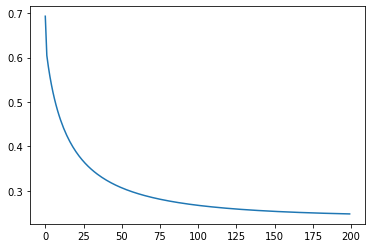

In [162]:
import matplotlib.pyplot as plt
number_of_epochs = np.arange(0,num_of_epochs)
loss_to_plot = np.array(loss_to_plot)
print(number_of_epochs.shape)
print(loss_to_plot.shape)
plt.plot(number_of_epochs,loss_to_plot)


(200,)
(200,)


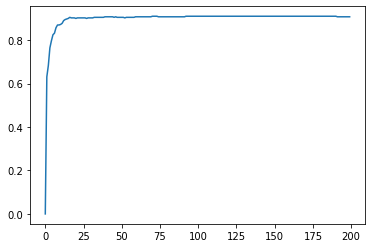

In [163]:
import matplotlib.pyplot as plt

number_of_epochs = np.arange(0,num_of_epochs)
accuracy_to_plot = np.array(accuracy_to_plot)
print(number_of_epochs.shape)
print(accuracy_to_plot.shape)
plt.plot(number_of_epochs,accuracy_to_plot)


In [164]:
y_pred_train_lor = predict(x_training,theta)


correct = 0
incorrect = 0

for i in range(len(y_pred_train_lor)):
  if y_pred_train_lor[i] == y_train[i]:
    correct+=1
  else:
    incorrect+=1
    
print(correct)
print(incorrect)

361
37


In [165]:
y_pred_test_lor = predict(x_testing,theta)


correct = 0
incorrect = 0

for i in range(len(y_pred_test_lor)):
  if y_pred_test_lor[i] == y_test[i]:
    correct+=1
  else:
    incorrect+=1
    
print(correct)
print(incorrect)

162
9


In [166]:
y_pred_train_acc_lor = []
y_train_acc_lor = []
for i in range(len(y_pred_train_lor)):

  if y_pred_train_lor[i] == -1:
    y_pred_train_acc_lor.append(-1)
  if y_pred_train_lor[i] == 1:
    y_pred_train_acc_lor.append(1)

  if y_train[i] == -1:
    y_train_acc_lor.append(-1)
  
  if y_train[i] == 1:
    y_train_acc_lor.append(1)

y_pred_train_acc_lor = np.array(y_pred_train_acc_lor)
y_train_acc_lor = np.array(y_train_acc_lor)
# print(y_pred_train_acc_lor)
# print(y_train_acc_lor)

In [167]:
from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = y_train_acc_lor, y_pred = y_pred_train_acc_lor))
TN, FP, FN, TP = confusion_matrix(y_train_acc_lor, y_pred_train_acc_lor).ravel()
training_accuracy_lor = (TP+TN) / (TP+TN+FP+FN)
print(TN, FP, FN, TP)
print("training accuracy_lor:",training_accuracy_lor*100,"%")
print(accuracy_score(y_true = y_train_acc_lor, y_pred = y_pred_train_acc_lor))



confusion_matrix:
 [[121  28]
 [  9 240]]
121 28 9 240
training accuracy_lor: 90.7035175879397 %
0.907035175879397


In [168]:
y_pred_test_acc_lor = []
y_test_acc_lor = []
for i in range(len(y_pred_test_lor)):

  if y_pred_test_lor[i] == -1:
    y_pred_test_acc_lor.append(-1)
  if y_pred_test_lor[i] == 1:
    y_pred_test_acc_lor.append(1)

  if y_test[i] == -1:
    y_test_acc_lor.append(-1)
  
  if y_test[i] == 1:
    y_test_acc_lor.append(1)

y_pred_test_acc_lor = np.array(y_pred_test_acc_lor)
y_test_acc_lor = np.array(y_test_acc_lor)
# print(y_pred_test_acc_lor)
# print(y_test_acc_lor)

In [169]:
from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = y_test_acc_lor, y_pred = y_pred_test_acc_lor))
TN, FP, FN, TP = confusion_matrix(y_test_acc_lor, y_pred_test_acc_lor).ravel()
testing_accuracy_lor = (TP+TN) / (TP+TN+FP+FN)
print(TN, FP, FN, TP)
print("testing accuracy_lor:",testing_accuracy_lor*100,"%")
print(accuracy_score(y_true = y_test_acc_lor, y_pred = y_pred_test_acc_lor))


confusion_matrix:
 [[ 57   6]
 [  3 105]]
57 6 3 105
testing accuracy_lor: 94.73684210526315 %
0.9473684210526315


# sklearn logistic regression

In [170]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(x_train, y_train)  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [171]:
from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = y_train, y_pred = clf.predict(x_train)))
TN, FP, FN, TP = confusion_matrix(y_train, clf.predict(x_train)).ravel()
training_accuracy_lor = (TP+TN) / (TP+TN+FP+FN)
print(TN, FP, FN, TP)
print("training accuracy_lor:",training_accuracy_lor*100,"%")
print(accuracy_score(y_true = y_train, y_pred = clf.predict(x_train)))


confusion_matrix:
 [[135  14]
 [ 10 239]]
135 14 10 239
training accuracy_lor: 93.96984924623115 %
0.9396984924623115


In [172]:
from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = y_test, y_pred = clf.predict(x_test)))
TN, FP, FN, TP = confusion_matrix(y_test, clf.predict(x_test)).ravel()
testing_accuracy_lor = (TP+TN) / (TP+TN+FP+FN)
print(TN, FP, FN, TP)
print("testing accuracy_lor:",testing_accuracy_lor*100,"%")
print(accuracy_score(y_true = y_test, y_pred = clf.predict(x_test)))

confusion_matrix:
 [[ 59   4]
 [  1 107]]
59 4 1 107
testing accuracy_lor: 97.07602339181285 %
0.9707602339181286


## **80:20 (train:test) split**

In [173]:
print(X1.shape)
print(Y1.shape)

(569, 30)
(569,)


In [174]:
x_train,x_test,y_train,y_test = train_test_split(X1,Y1,test_size = 0.2,shuffle = True,random_state = 42)

In [175]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(455, 30)
(114, 30)
(455,)
(114,)


# Data Preprocessing for Half-Space Classifier


In [176]:
X_Malign = []
X_Benign = []
Y_Malign = []
Y_Benign = []

for i in range(len(x_train)):

  if y_train[i] == -1:
    X_Malign.append(x_train[i])
    Y_Malign.append(y_train[i])
    
  elif y_train[i] == 1:
    X_Benign.append(x_train[i])
    Y_Benign.append(y_train[i])

X_Malign = np.array(X_Malign)
X_Benign = np.array(X_Benign)

print(X_Malign.shape)
print(X_Benign.shape)

(169, 30)
(286, 30)


In [177]:
def euclidean_distance(x1,c_):
  
  dist = np.sqrt(np.sum((x1-c_)**2))

  return dist

# centroidd of Malign data
X_Malign_Centroid = X_Malign.mean(axis = 0)
X_Benign_Centroid = X_Benign.mean(axis = 0)

distance_Benign = []
distance_Malign = []

X_redundant_points = []
Y_redundant_points = []

X_sep= []
Y_sep = []


for i in range(len(y_train)):

  dist_Malign = euclidean_distance(x_train[i],X_Malign_Centroid) 
  dist_Benign = euclidean_distance(x_train[i],X_Benign_Centroid) 

  if y_train[i] == -1 and dist_Malign < dist_Benign and dist_Malign <= 1000: # -1:M, 1:B # correct

    # X_Malign_sep.append(x_train[i])
    # Y_Malign.append(y_train[i])
    X_sep.append(x_train[i])
    Y_sep.append(y_train[i])
    distance_Malign.append(dist_Malign)
  
  elif y_train[i] == -1 and dist_Malign > dist_Benign: # incorrect
    
    X_redundant_points.append(x_train[i])
    Y_redundant_points.append(y_train[i])


  elif y_train[i] == 1 and dist_Benign < dist_Malign and dist_Benign <= 200  : # -1:M, 1:B # correct

    # X_Malign_sep.append(x_train[i])
    # Y_Malign.append(y_train[i])
    X_sep.append(x_train[i])
    Y_sep.append(y_train[i])
    distance_Benign.append(dist_Benign)
  
  elif y_train[i] == 1 and dist_Benign > dist_Malign: # incorrect
    
    X_redundant_points.append(x_train[i])
    Y_redundant_points.append(y_train[i])

X_sep = np.array(X_sep)
Y_sep = np.array(Y_sep)

print(X_sep.shape)
print(Y_sep.shape)

  

(288, 30)
(288,)



**PCA on Linearly Seperable Dataset**

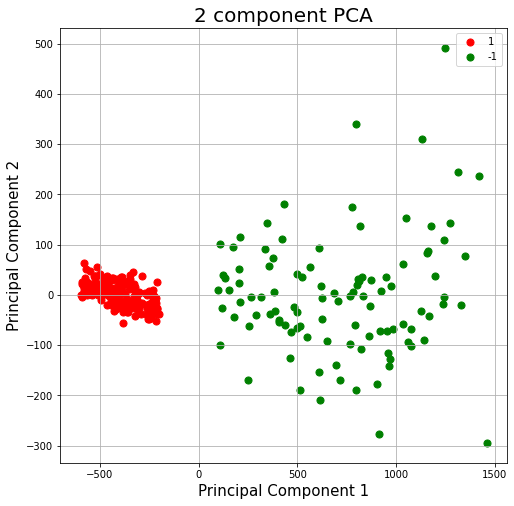

In [178]:
# PCA on Linearly Seperable Dataset

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_sep)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
Y_df = pd.DataFrame(Y_sep,columns=['target'])
finalDf = pd.concat([principalDf, Y_df[['target']]], axis = 1)
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,-1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

# LP Solver

In [180]:
from scipy.optimize import linprog
A = []
for i in range(len(X_sep)):
  A.append(X_sep[i]*Y_sep[i]) 
A = -1*np.array(A)
print(A.shape)

V = -1*np.ones(len(Y_sep))
V = np.reshape(V,(len(V),1))
print(V.shape)


obj = [0 for j in range(np.array(X_sep).shape[1])]

lhs_ineq = []
rhs_ineq = []

for i in range(len(A)):
  lhs_ineq.append(list(A[i]))
  rhs_ineq.append(V[i])
bnd=(None,None)
opt = linprog(c=obj,A_ub=lhs_ineq,b_ub=rhs_ineq,bounds=bnd,method ='simplex',options={"disp": True})


print(opt)
weights = opt['x']
print(weights.shape)

optimized_weights = []
for i in weights:
  optimized_weights.append(i)
optimized_weights = np.array(optimized_weights)

y_pred_train_lp = np.sign(np.matmul(X_sep,optimized_weights))

correct = 0
incorrect = 0

for i in range(len(y_pred_train_lp)):
  if y_pred_train_lp[i] == Y_sep[i]:
    correct+=1
  else:
    incorrect+=1
    
print(correct)
print(incorrect)


y_pred_train_acc_lp = []
y_train_acc_lp = []
for i in range(len(y_pred_train_lp)):

  if y_pred_train_lp[i] == -1:
    y_pred_train_acc_lp.append(-1)
  if y_pred_train_lp[i] == 1:
    y_pred_train_acc_lp.append(1)

  if Y_sep[i] == -1:
    y_train_acc_lp.append(-1)
  
  if Y_sep[i] == 1:
    y_train_acc_lp.append(1)

y_pred_train_acc_lp = np.array(y_pred_train_acc_lp)
y_train_acc_lp = np.array(y_train_acc_lp)
# print(y_pred_train_acc_lp)
# print(y_train_acc_lp)


from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = y_train_acc_lp, y_pred = y_pred_train_acc_lp))
TN, FP, FN, TP = confusion_matrix(y_train_acc_lp, y_pred_train_acc_lp).ravel()
training_accuracy_lp = (TP+TN) / (TP+TN+FP+FN)
print(TN, FP, FN, TP)
print("training accuracy_lp:",training_accuracy_lp*100,"%")
print(accuracy_score(y_true = y_train_acc_lp, y_pred = y_pred_train_acc_lp))


y_pred_test_lp = np.sign(np.matmul(x_test,optimized_weights))

correct = 0
incorrect = 0

for i in range(len(y_pred_test_lp)):
  if y_pred_test_lp[i] == y_test[i]:
    correct+=1
  else:
    incorrect+=1
    
print(correct)
print(incorrect)



y_pred_test_acc_lp = []
y_test_acc_lp = []
for i in range(len(y_pred_test_lp)):

  if y_pred_test_lp[i] == -1:
    y_pred_test_acc_lp.append(-1)
  if y_pred_test_lp[i] == 1:
    y_pred_test_acc_lp.append(1)

  if y_test[i] == -1:
    y_test_acc_lp.append(-1)
  
  if y_test[i] == 1:
    y_test_acc_lp.append(1)

y_pred_test_acc_lp = np.array(y_pred_test_acc_lp)
y_test_acc_lp = np.array(y_test_acc_lp)
# print(y_pred_test_acc_lp)
# print(y_test_acc_lp)


from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = y_test_acc_lp, y_pred = y_pred_test_acc_lp))
TN, FP, FN, TP = confusion_matrix(y_test_acc_lp, y_pred_test_acc_lp).ravel()
testing_accuracy_lp = (TP+TN) / (TP+TN+FP+FN)
print(TN, FP, FN, TP)
print("testing accuracy_lp:",testing_accuracy_lp*100,"%")
print(accuracy_score(y_true = y_test_acc_lp, y_pred = y_pred_test_acc_lp))



(288, 30)
(288, 1)
Optimization terminated successfully.
         Current function value: 0.000000    
         Iterations: 493
     con: array([], dtype=float64)
     fun: 0.0
 message: 'Optimization terminated successfully.'
     nit: 493
   slack: array([ 1.75716875e+01,  3.02820093e+00,  5.21666083e+00,  3.53688914e+00,
        1.11547355e+01,  4.14772516e+00,  1.39025980e+01,  3.62349345e+00,
        2.50040172e+00,  1.01630674e+01, -8.45545856e-13,  5.59440503e+00,
        6.21724894e-13,  4.09721805e+00,  2.84751090e+00,  6.27314321e+00,
        5.72664743e+00,  7.17960070e+00,  4.07616627e+00,  3.23760106e+00,
       -7.49622586e-13,  9.21707249e+00,  1.99972140e+00,  8.58700064e+00,
        1.21535721e+01,  8.16814309e+00,  6.89763452e+00,  8.12034764e+00,
        7.00091948e+00,  6.04850647e+00,  7.25571992e+00,  2.26731305e+00,
        5.51812138e+00,  2.03432447e+00,  4.75020770e+00,  3.32315542e+00,
        5.32907052e-13,  2.86890728e+00,  9.69553254e+00,  3.37796984e+00,

# Perceptron

In [181]:
def perceptron(x_train,y_train):

  weights = np.zeros(x_train.shape[1])
  
  flag = 0
  t = 0
  while(flag == 0):
  # for t in range(num_iterations):
    flag = 1
    for i in range(len(x_train)):
      if y_train[i]*np.sum(x_train[i]*weights) <= 0:
        flag = 0
        weights = weights + y_train[i]*x_train[i]
    # print(weights)
    t+=1

  return weights,t
  
w,t = perceptron(X_sep,Y_sep)
print(w,t)

print("weights:\n",w,"\n num_of_iterations:",t)

y_pred_train_per = np.sign(np.matmul(X_sep,w))

correct = 0
incorrect = 0

for i in range(len(y_pred_train_per)):
  if y_pred_train_per[i] == Y_sep[i]:
    correct+=1
  else:
    incorrect+=1
    
print(correct)
print(incorrect)


y_pred_train_acc_lp = []
y_train_acc_lp = []
for i in range(len(y_pred_train_lp)):

  if y_pred_train_lp[i] == -1:
    y_pred_train_acc_lp.append(-1)
  if y_pred_train_lp[i] == 1:
    y_pred_train_acc_lp.append(1)

  if Y_sep[i] == -1:
    y_train_acc_lp.append(-1)
  
  if Y_sep[i] == 1:
    y_train_acc_lp.append(1)

y_pred_train_acc_lp = np.array(y_pred_train_acc_lp)
y_train_acc_lp = np.array(y_train_acc_lp)
# print(y_pred_train_acc_lp)
# print(y_train_acc_lp)



from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = y_train_acc_lp, y_pred = y_pred_train_acc_lp))
TN, FP, FN, TP = confusion_matrix(y_train_acc_lp, y_pred_train_acc_lp).ravel()
training_accuracy_lp = (TP+TN) / (TP+TN+FP+FN)
print(TN, FP, FN, TP)
print("training accuracy_lp:",training_accuracy_lp*100,"%")
print(accuracy_score(y_true = y_train_acc_lp, y_pred = y_pred_train_acc_lp))


y_pred_test_lp = np.sign(np.matmul(x_test,w))

correct = 0
incorrect = 0

for i in range(len(y_pred_test_lp)):
  if y_pred_test_lp[i] == y_test[i]:
    correct+=1
  else:
    incorrect+=1
    
print(correct)
print(incorrect)


y_pred_test_acc_lp = []
y_test_acc_lp = []
for i in range(len(y_pred_test_lp)):

  if y_pred_test_lp[i] == -1:
    y_pred_test_acc_lp.append(-1)
  if y_pred_test_lp[i] == 1:
    y_pred_test_acc_lp.append(1)

  if y_test[i] == -1:
    y_test_acc_lp.append(-1)
  
  if y_test[i] == 1:
    y_test_acc_lp.append(1)

y_pred_test_acc_lp = np.array(y_pred_test_acc_lp)
y_test_acc_lp = np.array(y_test_acc_lp)
# print(y_pred_test_acc_lp)
# print(y_test_acc_lp)


from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = y_test_acc_lp, y_pred = y_pred_test_acc_lp))
TN, FP, FN, TP = confusion_matrix(y_test_acc_lp, y_pred_test_acc_lp).ravel()
testing_accuracy_lp = (TP+TN) / (TP+TN+FP+FN)
print(TN, FP, FN, TP)
print("testing accuracy_lp:",testing_accuracy_lp*100,"%")
print(accuracy_score(y_true = y_test_acc_lp, y_pred = y_pred_test_acc_lp))




[ 1.7669500e+03  2.8029100e+03  1.0660270e+04  9.2990000e+02
  1.9988970e+01  5.5589000e+00 -1.7597314e+01 -6.6236550e+00
  3.5897900e+01  1.4954450e+01  2.3993700e+01  1.8341950e+02
  1.1014760e+02 -1.6793080e+03  4.6381600e-01 -1.1688000e-01
 -3.0194281e+00 -2.2792100e-01  3.6289640e+00  2.8677140e-01
  1.9172000e+03  3.9067600e+03  1.1475540e+04 -3.7137000e+03
  2.6951890e+01  1.3029570e+01 -1.6176480e+01 -1.5859380e+00
  5.7381300e+01  1.8152540e+01] 34
weights:
 [ 1.7669500e+03  2.8029100e+03  1.0660270e+04  9.2990000e+02
  1.9988970e+01  5.5589000e+00 -1.7597314e+01 -6.6236550e+00
  3.5897900e+01  1.4954450e+01  2.3993700e+01  1.8341950e+02
  1.1014760e+02 -1.6793080e+03  4.6381600e-01 -1.1688000e-01
 -3.0194281e+00 -2.2792100e-01  3.6289640e+00  2.8677140e-01
  1.9172000e+03  3.9067600e+03  1.1475540e+04 -3.7137000e+03
  2.6951890e+01  1.3029570e+01 -1.6176480e+01 -1.5859380e+00
  5.7381300e+01  1.8152540e+01] 
 num_of_iterations: 34
288
0
confusion_matrix:
 [[104   0]
 [  0 184

# Logistic Regression Classifier (Scratch)

(455, 30)
(455,)
epoch: 0 loss: 0.6931471805599468 accuracy: 0.0
epoch: 1 loss: 0.6118386769742188 accuracy: 0.6461538461538462
epoch: 2 loss: 0.5843860168483861 accuracy: 0.7142857142857143
epoch: 3 loss: 0.5608028601575687 accuracy: 0.778021978021978
epoch: 4 loss: 0.5403873610396853 accuracy: 0.8043956043956044
epoch: 5 loss: 0.5224916132674529 accuracy: 0.832967032967033
epoch: 6 loss: 0.5066315570457696 accuracy: 0.843956043956044
epoch: 7 loss: 0.49244173094059285 accuracy: 0.8527472527472527
epoch: 8 loss: 0.47964321251571795 accuracy: 0.865934065934066
epoch: 9 loss: 0.46802035082573157 accuracy: 0.8703296703296703
epoch: 10 loss: 0.4574040332483528 accuracy: 0.8769230769230769
epoch: 11 loss: 0.44765945929088663 accuracy: 0.8813186813186813
epoch: 12 loss: 0.43867725332665214 accuracy: 0.8923076923076924
epoch: 13 loss: 0.430367123092774 accuracy: 0.8967032967032967
epoch: 14 loss: 0.422653391940531 accuracy: 0.9054945054945055
epoch: 15 loss: 0.41547184439968887 accuracy: 0.9

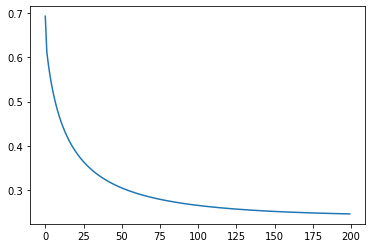

(200,)
(200,)


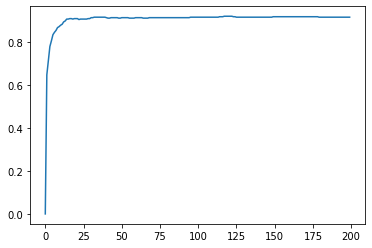

416
39
107
7
confusion_matrix:
 [[142  27]
 [ 12 274]]
142 27 12 274
training accuracy_lor: 91.42857142857143 %
0.9142857142857143
confusion_matrix:
 [[38  5]
 [ 2 69]]
38 5 2 69
testing accuracy_lor: 93.85964912280701 %
0.9385964912280702


In [184]:
print(x_train.shape)
print(y_train.shape)

x0 = np.ones(len(x_train))
x0 = np.reshape(x0,(len(x0),1))
x_training = np.hstack((x0,x_train))
x0 = np.ones(len(x_test))
x0 = np.reshape(x0,(len(x0),1))
x_testing = np.hstack((x0,x_test))



from sklearn.metrics import confusion_matrix,accuracy_score


def helper_conversion(y_pred,y_true):

    y_pred_help = []
    y_true_help = []

    for i in range(len(y_pred)):

      if y_pred[i] == -1:
        y_pred_help.append(-1)
      if y_pred[i] == 1:
        y_pred_help.append(1)

      #### beacuse initially weights = 0 and when predicted with x get value = 0 ######
      if y_pred[i] == 0:
        y_pred_help.append(0)



      if y_true[i] == -1:
        y_true_help.append(-1)
      
      if y_true[i] == 1:
        y_true_help.append(1)

    y_pred_help = np.array(y_pred_help)
    y_true_help = np.array(y_true_help)

    return y_pred_help,y_true_help


def predict(x,theta):

  y_pred = []
  for i in range(len(x)):
    pred = np.dot(x[i],theta)

    y_pred.append(np.sign(pred))

  return y_pred


def loss_function(x1,y1,theta1):

  return np.log(1+np.exp(-y1*np.dot(x1,theta1)))



def gradient_descent(x,y,theta,alpha):

  loss = 0.0
  temp=np.zeros_like(theta)


  for i in range(len(x)):

      temp[0] = theta[0] - alpha * 1/len(x) * -y[i] * 1 * np.exp(-y[i]*np.dot(x[i],theta)) * (1/(1+np.exp(-y[i]*np.dot(x[i],theta))))

      for j in range(len(theta)-1):

        gradient = -y[i] * x[i][j] * np.exp(-y[i]*np.dot(x[i],theta)) * (1/(1+np.exp(-y[i]*np.dot(x[i],theta))))
      
        temp[j+1] = theta[j+1] - alpha * 1/len(x) * gradient
      
      temp = theta
      loss += loss_function(x[i],y[i],theta)

  loss = (1/len(x)) * loss
  return loss,theta

  
def fit(x,y,theta,alpha,epochs):

  losses_per_epoch = []
  accuracies_per_epoch = []

  for e in range(1,epochs):
    
      loss,theta = gradient_descent(x,y,theta,alpha)
      y_pred_training = predict(x,theta)
      y_pred_help,y_true_help = helper_conversion(y_pred_training,y)
      accuracy = accuracy_score(y_true = y_true_help, y_pred = y_pred_help)

      print("epoch:",e,"loss:",loss,"accuracy:",accuracy)#,"weights:",theta)
      losses_per_epoch.append(loss)
      accuracies_per_epoch.append(accuracy)  

  
  return loss,theta,losses_per_epoch,accuracies_per_epoch





theta = [0.0 for t in range(0,x_train.shape[1]+1)]

alpha =  0.001

initial_loss = 0.0
for i in range(len(x_training)):
  initial_loss += loss_function(x_training[i],y_train[i],theta)

# print(initial_loss)

y_pred_training = predict(x_training,theta)
y_pred_help,y_true_help = helper_conversion(y_pred_training,y_train)
initial_accuracy = accuracy_score(y_true = y_true_help, y_pred = y_pred_help)


print("epoch:",0,"loss:",initial_loss/len(x_training),"accuracy:",initial_accuracy)


loss_to_plot = []
accuracy_to_plot = []
loss_to_plot.append(initial_loss/len(x_training))
accuracy_to_plot.append(0.0)

num_of_epochs = 200
loss,theta,losses_per_epoch,accuracies_per_epoch = fit(x_training,y_train,theta,alpha,num_of_epochs)
loss_to_plot = loss_to_plot + losses_per_epoch
accuracy_to_plot = accuracy_to_plot + accuracies_per_epoch


print(np.array(theta))

import matplotlib.pyplot as plt
number_of_epochs = np.arange(0,num_of_epochs)
loss_to_plot = np.array(loss_to_plot)
print(number_of_epochs.shape)
print(loss_to_plot.shape)
plt.plot(number_of_epochs,loss_to_plot)
plt.show()

import matplotlib.pyplot as plt
number_of_epochs = np.arange(0,num_of_epochs)
accuracy_to_plot = np.array(accuracy_to_plot)
print(number_of_epochs.shape)
print(accuracy_to_plot.shape)
plt.plot(number_of_epochs,accuracy_to_plot)
plt.show()


y_pred_train_lor = predict(x_training,theta)


correct = 0
incorrect = 0

for i in range(len(y_pred_train_lor)):
  if y_pred_train_lor[i] == y_train[i]:
    correct+=1
  else:
    incorrect+=1
    
print(correct)
print(incorrect)



y_pred_test_lor = predict(x_testing,theta)


correct = 0
incorrect = 0

for i in range(len(y_pred_test_lor)):
  if y_pred_test_lor[i] == y_test[i]:
    correct+=1
  else:
    incorrect+=1
    
print(correct)
print(incorrect)


y_pred_train_acc_lor = []
y_train_acc_lor = []
for i in range(len(y_pred_train_lor)):

  if y_pred_train_lor[i] == -1:
    y_pred_train_acc_lor.append(-1)
  if y_pred_train_lor[i] == 1:
    y_pred_train_acc_lor.append(1)

  if y_train[i] == -1:
    y_train_acc_lor.append(-1)
  
  if y_train[i] == 1:
    y_train_acc_lor.append(1)

y_pred_train_acc_lor = np.array(y_pred_train_acc_lor)
y_train_acc_lor = np.array(y_train_acc_lor)
# print(y_pred_train_acc_lor)
# print(y_train_acc_lor)


from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = y_train_acc_lor, y_pred = y_pred_train_acc_lor))
TN, FP, FN, TP = confusion_matrix(y_train_acc_lor, y_pred_train_acc_lor).ravel()
training_accuracy_lor = (TP+TN) / (TP+TN+FP+FN)
print(TN, FP, FN, TP)
print("training accuracy_lor:",training_accuracy_lor*100,"%")
print(accuracy_score(y_true = y_train_acc_lor, y_pred = y_pred_train_acc_lor))



y_pred_test_acc_lor = []
y_test_acc_lor = []
for i in range(len(y_pred_test_lor)):

  if y_pred_test_lor[i] == -1:
    y_pred_test_acc_lor.append(-1)
  if y_pred_test_lor[i] == 1:
    y_pred_test_acc_lor.append(1)

  if y_test[i] == -1:
    y_test_acc_lor.append(-1)
  
  if y_test[i] == 1:
    y_test_acc_lor.append(1)

y_pred_test_acc_lor = np.array(y_pred_test_acc_lor)
y_test_acc_lor = np.array(y_test_acc_lor)
# print(y_pred_test_acc_lor)
# print(y_test_acc_lor)


from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = y_test_acc_lor, y_pred = y_pred_test_acc_lor))
TN, FP, FN, TP = confusion_matrix(y_test_acc_lor, y_pred_test_acc_lor).ravel()
testing_accuracy_lor = (TP+TN) / (TP+TN+FP+FN)
print(TN, FP, FN, TP)
print("testing accuracy_lor:",testing_accuracy_lor*100,"%")
print(accuracy_score(y_true = y_test_acc_lor, y_pred = y_pred_test_acc_lor))



# sklearn logistic regression

In [185]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(x_train, y_train)  


from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = y_train, y_pred = clf.predict(x_train)))
TN, FP, FN, TP = confusion_matrix(y_train, clf.predict(x_train)).ravel()
training_accuracy_lor = (TP+TN) / (TP+TN+FP+FN)
print(TN, FP, FN, TP)
print("training accuracy_lor:",training_accuracy_lor*100,"%")
print(accuracy_score(y_true = y_train, y_pred = clf.predict(x_train)))

from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = y_test, y_pred = clf.predict(x_test)))
TN, FP, FN, TP = confusion_matrix(y_test, clf.predict(x_test)).ravel()
testing_accuracy_lor = (TP+TN) / (TP+TN+FP+FN)
print(TN, FP, FN, TP)
print("testing accuracy_lor:",testing_accuracy_lor*100,"%")
print(accuracy_score(y_true = y_test, y_pred = clf.predict(x_test)))

confusion_matrix:
 [[154  15]
 [ 10 276]]
154 15 10 276
training accuracy_lor: 94.5054945054945 %
0.945054945054945
confusion_matrix:
 [[40  3]
 [ 1 70]]
40 3 1 70
testing accuracy_lor: 96.49122807017544 %
0.9649122807017544


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## **90:10 (train:test) split**

In [186]:
print(X1.shape)
print(Y1.shape)

(569, 30)
(569,)


In [187]:
x_train,x_test,y_train,y_test = train_test_split(X1,Y1,test_size = 0.1,shuffle = True,random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(512, 30)
(57, 30)
(512,)
(57,)


# Data Preprocessing for Half-Space Classifier


In [188]:
X_Malign = []
X_Benign = []
Y_Malign = []
Y_Benign = []

for i in range(len(x_train)):

  if y_train[i] == -1:
    X_Malign.append(x_train[i])
    Y_Malign.append(y_train[i])
    
  elif y_train[i] == 1:
    X_Benign.append(x_train[i])
    Y_Benign.append(y_train[i])

X_Malign = np.array(X_Malign)
X_Benign = np.array(X_Benign)

print(X_Malign.shape)
print(X_Benign.shape)


def euclidean_distance(x1,c_):
  
  dist = np.sqrt(np.sum((x1-c_)**2))

  return dist

# centroidd of Malign data
X_Malign_Centroid = X_Malign.mean(axis = 0)
X_Benign_Centroid = X_Benign.mean(axis = 0)

distance_Benign = []
distance_Malign = []

X_redundant_points = []
Y_redundant_points = []

X_sep= []
Y_sep = []


for i in range(len(y_train)):

  dist_Malign = euclidean_distance(x_train[i],X_Malign_Centroid) 
  dist_Benign = euclidean_distance(x_train[i],X_Benign_Centroid) 

  if y_train[i] == -1 and dist_Malign < dist_Benign and dist_Malign <= 1000: # -1:M, 1:B # correct

    # X_Malign_sep.append(x_train[i])
    # Y_Malign.append(y_train[i])
    X_sep.append(x_train[i])
    Y_sep.append(y_train[i])
    distance_Malign.append(dist_Malign)
  
  elif y_train[i] == -1 and dist_Malign > dist_Benign: # incorrect
    
    X_redundant_points.append(x_train[i])
    Y_redundant_points.append(y_train[i])


  elif y_train[i] == 1 and dist_Benign < dist_Malign and dist_Benign <= 200  : # -1:M, 1:B # correct

    # X_Malign_sep.append(x_train[i])
    # Y_Malign.append(y_train[i])
    X_sep.append(x_train[i])
    Y_sep.append(y_train[i])
    distance_Benign.append(dist_Benign)
  
  elif y_train[i] == 1 and dist_Benign > dist_Malign: # incorrect
    
    X_redundant_points.append(x_train[i])
    Y_redundant_points.append(y_train[i])

X_sep = np.array(X_sep)
Y_sep = np.array(Y_sep)

print(X_sep.shape)
print(Y_sep.shape)

  
  

(195, 30)
(317, 30)
(326, 30)
(326,)



**PCA on Linearly Seperable Dataset**

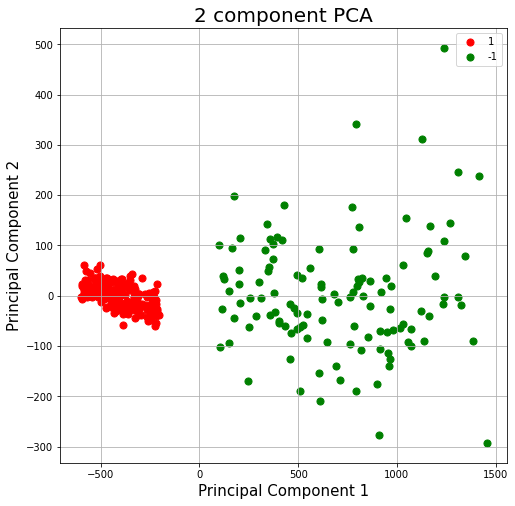

In [189]:
# PCA on Linearly Seperable Dataset

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_sep)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
Y_df = pd.DataFrame(Y_sep,columns=['target'])
finalDf = pd.concat([principalDf, Y_df[['target']]], axis = 1)
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,-1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

# LP Solver

In [190]:
from scipy.optimize import linprog
A = []
for i in range(len(X_sep)):
  A.append(X_sep[i]*Y_sep[i]) 
A = -1*np.array(A)
print(A.shape)

V = -1*np.ones(len(Y_sep))
V = np.reshape(V,(len(V),1))
print(V.shape)


obj = [0 for j in range(np.array(X_sep).shape[1])]

lhs_ineq = []
rhs_ineq = []

for i in range(len(A)):
  lhs_ineq.append(list(A[i]))
  rhs_ineq.append(V[i])
bnd=(None,None)
opt = linprog(c=obj,A_ub=lhs_ineq,b_ub=rhs_ineq,bounds=bnd,method ='simplex',options={"disp": True})


print(opt)
weights = opt['x']
print(weights.shape)

optimized_weights = []
for i in weights:
  optimized_weights.append(i)
optimized_weights = np.array(optimized_weights)

y_pred_train_lp = np.sign(np.matmul(X_sep,optimized_weights))

correct = 0
incorrect = 0

for i in range(len(y_pred_train_lp)):
  if y_pred_train_lp[i] == Y_sep[i]:
    correct+=1
  else:
    incorrect+=1
    
print(correct)
print(incorrect)


y_pred_train_acc_lp = []
y_train_acc_lp = []
for i in range(len(y_pred_train_lp)):

  if y_pred_train_lp[i] == -1:
    y_pred_train_acc_lp.append(-1)
  if y_pred_train_lp[i] == 1:
    y_pred_train_acc_lp.append(1)

  if Y_sep[i] == -1:
    y_train_acc_lp.append(-1)
  
  if Y_sep[i] == 1:
    y_train_acc_lp.append(1)

y_pred_train_acc_lp = np.array(y_pred_train_acc_lp)
y_train_acc_lp = np.array(y_train_acc_lp)
# print(y_pred_train_acc_lp)
# print(y_train_acc_lp)


from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = y_train_acc_lp, y_pred = y_pred_train_acc_lp))
TN, FP, FN, TP = confusion_matrix(y_train_acc_lp, y_pred_train_acc_lp).ravel()
training_accuracy_lp = (TP+TN) / (TP+TN+FP+FN)
print(TN, FP, FN, TP)
print("training accuracy_lp:",training_accuracy_lp*100,"%")
print(accuracy_score(y_true = y_train_acc_lp, y_pred = y_pred_train_acc_lp))


y_pred_test_lp = np.sign(np.matmul(x_test,optimized_weights))
# y_test_true = np.array(y_test)
correct = 0
incorrect = 0

for i in range(len(y_pred_test_lp)):
  if y_pred_test_lp[i] == y_test[i]:
    correct+=1
  else:
    incorrect+=1
    
print(correct)
print(incorrect)



y_pred_test_acc_lp = []
y_test_acc_lp = []
for i in range(len(y_pred_test_lp)):

  if y_pred_test_lp[i] == -1:
    y_pred_test_acc_lp.append(-1)
  if y_pred_test_lp[i] == 1:
    y_pred_test_acc_lp.append(1)

  if y_test[i] == -1:
    y_test_acc_lp.append(-1)
  
  if y_test[i] == 1:
    y_test_acc_lp.append(1)

y_pred_test_acc_lp = np.array(y_pred_test_acc_lp)
y_test_acc_lp = np.array(y_test_acc_lp)
# print(y_pred_test_acc_lp)
# print(y_test_acc_lp)


from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = y_test_acc_lp, y_pred = y_pred_test_acc_lp))
TN, FP, FN, TP = confusion_matrix(y_test_acc_lp, y_pred_test_acc_lp).ravel()
testing_accuracy_lp = (TP+TN) / (TP+TN+FP+FN)
print(TN, FP, FN, TP)
print("testing accuracy_lp:",testing_accuracy_lp*100,"%")
print(accuracy_score(y_true = y_test_acc_lp, y_pred = y_pred_test_acc_lp))



(326, 30)
(326, 1)
Optimization terminated successfully.
         Current function value: 0.000000    
         Iterations: 642
     con: array([], dtype=float64)
     fun: 0.0
 message: 'Optimization terminated successfully.'
     nit: 642
   slack: array([ 2.75198725e+00,  1.40062266e+00,  1.49577139e+01,  2.11250301e+01,
        1.98541454e+00,  1.07069992e+00,  5.87169892e+00,  7.64716279e+00,
        1.28655120e+00,  3.38502397e+00,  3.96771172e+00,  9.14898937e-02,
        7.89367781e-01,  4.32183357e-01,  3.97343150e+00,  5.07183652e+00,
        3.29208102e+00,  3.92140013e+00,  2.13699283e+01,  5.61629700e+00,
        8.94682694e+00,  3.63401635e+00,  2.37776468e+00,  2.66456155e+00,
        1.03003289e+00,  1.75524083e+00,  2.96422343e+00,  1.44040986e+01,
        6.53699317e-13,  2.85104653e+00,  6.16543542e+00,  4.91038776e+00,
        1.40260458e+01,  6.83230906e+00,  6.03423179e+00,  4.56882737e+00,
        2.16520027e+00,  3.57685147e+00,  2.77667443e+00,  2.03316803e+01,

# Perceptron

In [191]:
def perceptron(x_train,y_train):

  weights = np.zeros(x_train.shape[1])
  
  flag = 0
  t = 0
  while(flag == 0):
  # for t in range(num_iterations):
    flag = 1
    for i in range(len(x_train)):
      if y_train[i]*np.sum(x_train[i]*weights) <= 0:
        flag = 0
        weights = weights + y_train[i]*x_train[i]
    # print(weights)
    t+=1

  return weights,t
  
w,t = perceptron(X_sep,Y_sep)
print(w,t)

print("weights:\n",w,"\n num_of_iterations:",t)

y_pred_train_per = np.sign(np.matmul(X_sep,w))

correct = 0
incorrect = 0

for i in range(len(y_pred_train_per)):
  if y_pred_train_per[i] == Y_sep[i]:
    correct+=1
  else:
    incorrect+=1
    
print(correct)
print(incorrect)


y_pred_train_acc_lp = []
y_train_acc_lp = []
for i in range(len(y_pred_train_lp)):

  if y_pred_train_lp[i] == -1:
    y_pred_train_acc_lp.append(-1)
  if y_pred_train_lp[i] == 1:
    y_pred_train_acc_lp.append(1)

  if Y_sep[i] == -1:
    y_train_acc_lp.append(-1)
  
  if Y_sep[i] == 1:
    y_train_acc_lp.append(1)

y_pred_train_acc_lp = np.array(y_pred_train_acc_lp)
y_train_acc_lp = np.array(y_train_acc_lp)
# print(y_pred_train_acc_lp)
# print(y_train_acc_lp)



from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = y_train_acc_lp, y_pred = y_pred_train_acc_lp))
TN, FP, FN, TP = confusion_matrix(y_train_acc_lp, y_pred_train_acc_lp).ravel()
training_accuracy_lp = (TP+TN) / (TP+TN+FP+FN)
print(TN, FP, FN, TP)
print("training accuracy_lp:",training_accuracy_lp*100,"%")
print(accuracy_score(y_true = y_train_acc_lp, y_pred = y_pred_train_acc_lp))


y_pred_test_lp = np.sign(np.matmul(x_test,w))

correct = 0
incorrect = 0

for i in range(len(y_pred_test_lp)):
  if y_pred_test_lp[i] == y_test[i]:
    correct+=1
  else:
    incorrect+=1
    
print(correct)
print(incorrect)


y_pred_test_acc_lp = []
y_test_acc_lp = []
for i in range(len(y_pred_test_lp)):

  if y_pred_test_lp[i] == -1:
    y_pred_test_acc_lp.append(-1)
  if y_pred_test_lp[i] == 1:
    y_pred_test_acc_lp.append(1)

  if y_test[i] == -1:
    y_test_acc_lp.append(-1)
  
  if y_test[i] == 1:
    y_test_acc_lp.append(1)

y_pred_test_acc_lp = np.array(y_pred_test_acc_lp)
y_test_acc_lp = np.array(y_test_acc_lp)
# print(y_pred_test_acc_lp)
# print(y_test_acc_lp)


from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = y_test_acc_lp, y_pred = y_pred_test_acc_lp))
TN, FP, FN, TP = confusion_matrix(y_test_acc_lp, y_pred_test_acc_lp).ravel()
testing_accuracy_lp = (TP+TN) / (TP+TN+FP+FN)
print(TN, FP, FN, TP)
print("testing accuracy_lp:",testing_accuracy_lp*100,"%")
print(accuracy_score(y_true = y_test_acc_lp, y_pred = y_pred_test_acc_lp))




[ 1.92118000e+03  3.08057000e+03  1.15929300e+04  1.65460000e+03
  2.22015800e+01  6.37014000e+00 -1.90215729e+01 -7.05977600e+00
  3.97392000e+01  1.62545800e+01  2.62567000e+01  1.90607200e+02
  1.29070500e+02 -1.89455300e+03  7.67934000e-01 -9.26980000e-02
 -3.00583200e+00 -1.43349000e-01  4.21163700e+00  3.29323400e-01
  2.07390000e+03  4.08115000e+03  1.23354200e+04 -4.57400000e+03
  2.95665000e+01  1.19141300e+01 -2.27087860e+01 -2.35929800e+00
  6.45060000e+01  1.92959000e+01] 29
weights:
 [ 1.92118000e+03  3.08057000e+03  1.15929300e+04  1.65460000e+03
  2.22015800e+01  6.37014000e+00 -1.90215729e+01 -7.05977600e+00
  3.97392000e+01  1.62545800e+01  2.62567000e+01  1.90607200e+02
  1.29070500e+02 -1.89455300e+03  7.67934000e-01 -9.26980000e-02
 -3.00583200e+00 -1.43349000e-01  4.21163700e+00  3.29323400e-01
  2.07390000e+03  4.08115000e+03  1.23354200e+04 -4.57400000e+03
  2.95665000e+01  1.19141300e+01 -2.27087860e+01 -2.35929800e+00
  6.45060000e+01  1.92959000e+01] 
 num_of_

# Logistic Regression Classifier (Scratch)

(512, 30)
(512,)
epoch: 0 loss: 0.6931471805599468 accuracy: 0.0
epoch: 1 loss: 0.6169617931522426 accuracy: 0.642578125
epoch: 2 loss: 0.5879534258733421 accuracy: 0.71875
epoch: 3 loss: 0.562550299547438 accuracy: 0.783203125
epoch: 4 loss: 0.5407568071161529 accuracy: 0.814453125
epoch: 5 loss: 0.5217851177912397 accuracy: 0.8359375
epoch: 6 loss: 0.5050578777934555 accuracy: 0.84765625
epoch: 7 loss: 0.49015011649672197 accuracy: 0.859375
epoch: 8 loss: 0.4767452548295388 accuracy: 0.865234375
epoch: 9 loss: 0.4646032897235312 accuracy: 0.873046875
epoch: 10 loss: 0.45353853705327984 accuracy: 0.880859375
epoch: 11 loss: 0.4434041471417991 accuracy: 0.88671875
epoch: 12 loss: 0.43408144715974095 accuracy: 0.89453125
epoch: 13 loss: 0.4254726760340041 accuracy: 0.900390625
epoch: 14 loss: 0.41749602155692567 accuracy: 0.900390625
epoch: 15 loss: 0.41008217189937995 accuracy: 0.90234375
epoch: 16 loss: 0.40317184872244405 accuracy: 0.90234375
epoch: 17 loss: 0.39671397989876417 accur

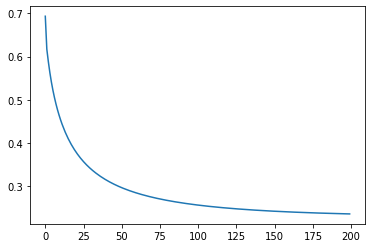

(200,)
(200,)


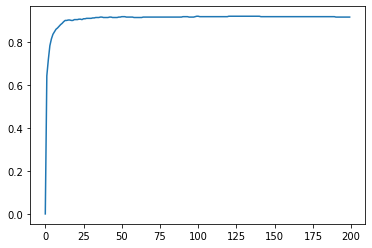

469
43
53
4
confusion_matrix:
 [[165  30]
 [ 13 304]]
165 30 13 304
training accuracy_lor: 91.6015625 %
0.916015625
confusion_matrix:
 [[15  2]
 [ 2 38]]
15 2 2 38
testing accuracy_lor: 92.98245614035088 %
0.9298245614035088


In [192]:
print(x_train.shape)
print(y_train.shape)

x0 = np.ones(len(x_train))
x0 = np.reshape(x0,(len(x0),1))
x_training = np.hstack((x0,x_train))
x0 = np.ones(len(x_test))
x0 = np.reshape(x0,(len(x0),1))
x_testing = np.hstack((x0,x_test))


from sklearn.metrics import confusion_matrix,accuracy_score


def helper_conversion(y_pred,y_true):

    y_pred_help = []
    y_true_help = []

    for i in range(len(y_pred)):

      if y_pred[i] == -1:
        y_pred_help.append(-1)
      if y_pred[i] == 1:
        y_pred_help.append(1)

      #### beacuse initially weights = 0 and when predicted with x get value = 0 ######
      if y_pred[i] == 0:
        y_pred_help.append(0)



      if y_true[i] == -1:
        y_true_help.append(-1)
      
      if y_true[i] == 1:
        y_true_help.append(1)

    y_pred_help = np.array(y_pred_help)
    y_true_help = np.array(y_true_help)

    return y_pred_help,y_true_help


def predict(x,theta):

  y_pred = []
  for i in range(len(x)):
    pred = np.dot(x[i],theta)

    y_pred.append(np.sign(pred))

  return y_pred


def loss_function(x1,y1,theta1):

  return np.log(1+np.exp(-y1*np.dot(x1,theta1)))



def gradient_descent(x,y,theta,alpha):

  loss = 0.0
  temp=np.zeros_like(theta)


  for i in range(len(x)):

      temp[0] = theta[0] - alpha * 1/len(x) * -y[i] * 1 * np.exp(-y[i]*np.dot(x[i],theta)) * (1/(1+np.exp(-y[i]*np.dot(x[i],theta))))

      for j in range(len(theta)-1):

        gradient = -y[i] * x[i][j] * np.exp(-y[i]*np.dot(x[i],theta)) * (1/(1+np.exp(-y[i]*np.dot(x[i],theta))))
      
        temp[j+1] = theta[j+1] - alpha * 1/len(x) * gradient
      
      temp = theta
      loss += loss_function(x[i],y[i],theta)

  loss = (1/len(x)) * loss
  return loss,theta

  
def fit(x,y,theta,alpha,epochs):

  losses_per_epoch = []
  accuracies_per_epoch = []

  for e in range(1,epochs):
    
      loss,theta = gradient_descent(x,y,theta,alpha)
      y_pred_training = predict(x,theta)
      y_pred_help,y_true_help = helper_conversion(y_pred_training,y)
      accuracy = accuracy_score(y_true = y_true_help, y_pred = y_pred_help)

      print("epoch:",e,"loss:",loss,"accuracy:",accuracy)#,"weights:",theta)
      losses_per_epoch.append(loss)
      accuracies_per_epoch.append(accuracy)  

  
  return loss,theta,losses_per_epoch,accuracies_per_epoch





theta = [0.0 for t in range(0,x_train.shape[1]+1)]

alpha =  0.001

initial_loss = 0.0
for i in range(len(x_training)):
  initial_loss += loss_function(x_training[i],y_train[i],theta)

# print(initial_loss)

y_pred_training = predict(x_training,theta)
y_pred_help,y_true_help = helper_conversion(y_pred_training,y_train)
initial_accuracy = accuracy_score(y_true = y_true_help, y_pred = y_pred_help)


print("epoch:",0,"loss:",initial_loss/len(x_training),"accuracy:",initial_accuracy)


loss_to_plot = []
accuracy_to_plot = []
loss_to_plot.append(initial_loss/len(x_training))
accuracy_to_plot.append(0.0)

num_of_epochs = 200
loss,theta,losses_per_epoch,accuracies_per_epoch = fit(x_training,y_train,theta,alpha,num_of_epochs)
loss_to_plot = loss_to_plot + losses_per_epoch
accuracy_to_plot = accuracy_to_plot + accuracies_per_epoch


print(np.array(theta))

import matplotlib.pyplot as plt
number_of_epochs = np.arange(0,num_of_epochs)
loss_to_plot = np.array(loss_to_plot)
print(number_of_epochs.shape)
print(loss_to_plot.shape)
plt.plot(number_of_epochs,loss_to_plot)
plt.show()

import matplotlib.pyplot as plt
number_of_epochs = np.arange(0,num_of_epochs)
accuracy_to_plot = np.array(accuracy_to_plot)
print(number_of_epochs.shape)
print(accuracy_to_plot.shape)
plt.plot(number_of_epochs,accuracy_to_plot)
plt.show()


y_pred_train_lor = predict(x_training,theta)


correct = 0
incorrect = 0

for i in range(len(y_pred_train_lor)):
  if y_pred_train_lor[i] == y_train[i]:
    correct+=1
  else:
    incorrect+=1
    
print(correct)
print(incorrect)



y_pred_test_lor = predict(x_testing,theta)


correct = 0
incorrect = 0

for i in range(len(y_pred_test_lor)):
  if y_pred_test_lor[i] == y_test[i]:
    correct+=1
  else:
    incorrect+=1
    
print(correct)
print(incorrect)


y_pred_train_acc_lor = []
y_train_acc_lor = []
for i in range(len(y_pred_train_lor)):

  if y_pred_train_lor[i] == -1:
    y_pred_train_acc_lor.append(-1)
  if y_pred_train_lor[i] == 1:
    y_pred_train_acc_lor.append(1)

  if y_train[i] == -1:
    y_train_acc_lor.append(-1)
  
  if y_train[i] == 1:
    y_train_acc_lor.append(1)

y_pred_train_acc_lor = np.array(y_pred_train_acc_lor)
y_train_acc_lor = np.array(y_train_acc_lor)
# print(y_pred_train_acc_lor)
# print(y_train_acc_lor)


from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = y_train_acc_lor, y_pred = y_pred_train_acc_lor))
TN, FP, FN, TP = confusion_matrix(y_train_acc_lor, y_pred_train_acc_lor).ravel()
training_accuracy_lor = (TP+TN) / (TP+TN+FP+FN)
print(TN, FP, FN, TP)
print("training accuracy_lor:",training_accuracy_lor*100,"%")
print(accuracy_score(y_true = y_train_acc_lor, y_pred = y_pred_train_acc_lor))



y_pred_test_acc_lor = []
y_test_acc_lor = []
for i in range(len(y_pred_test_lor)):

  if y_pred_test_lor[i] == -1:
    y_pred_test_acc_lor.append(-1)
  if y_pred_test_lor[i] == 1:
    y_pred_test_acc_lor.append(1)

  if y_test[i] == -1:
    y_test_acc_lor.append(-1)
  
  if y_test[i] == 1:
    y_test_acc_lor.append(1)

y_pred_test_acc_lor = np.array(y_pred_test_acc_lor)
y_test_acc_lor = np.array(y_test_acc_lor)
# print(y_pred_test_acc_lor)
# print(y_test_acc_lor)


from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = y_test_acc_lor, y_pred = y_pred_test_acc_lor))
TN, FP, FN, TP = confusion_matrix(y_test_acc_lor, y_pred_test_acc_lor).ravel()
testing_accuracy_lor = (TP+TN) / (TP+TN+FP+FN)
print(TN, FP, FN, TP)
print("testing accuracy_lor:",testing_accuracy_lor*100,"%")
print(accuracy_score(y_true = y_test_acc_lor, y_pred = y_pred_test_acc_lor))



# sklearn logistic regression

In [193]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(x_train, y_train)  


from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = y_train, y_pred = clf.predict(x_train)))
TN, FP, FN, TP = confusion_matrix(y_train, clf.predict(x_train)).ravel()
training_accuracy_lor = (TP+TN) / (TP+TN+FP+FN)
print(TN, FP, FN, TP)
print("training accuracy_lor:",training_accuracy_lor*100,"%")
print(accuracy_score(y_true = y_train, y_pred = clf.predict(x_train)))

from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:\n",confusion_matrix(y_true = y_test, y_pred = clf.predict(x_test)))
TN, FP, FN, TP = confusion_matrix(y_test, clf.predict(x_test)).ravel()
testing_accuracy_lor = (TP+TN) / (TP+TN+FP+FN)
print(TN, FP, FN, TP)
print("testing accuracy_lor:",testing_accuracy_lor*100,"%")
print(accuracy_score(y_true = y_test, y_pred = clf.predict(x_test)))

confusion_matrix:
 [[182  13]
 [ 10 307]]
182 13 10 307
training accuracy_lor: 95.5078125 %
0.955078125
confusion_matrix:
 [[16  1]
 [ 0 40]]
16 1 0 40
testing accuracy_lor: 98.24561403508771 %
0.9824561403508771


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
